<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Transforms as Filter Banks

In [15]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/4-5xq47I7gs" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Equivalent Analysis Filters of a DFT

In [16]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/57Vo03n-1AE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

From the definitions in lecture 2 we know that a DFT of a block of signal x is defined as:

$$\large
X(k) =\sum _ {n= 0}^ {N-1} x(mN+n) e^{-j \frac{2\pi} { N} \cdot k \cdot n}
$$

Hence we can rewrite the DFT as a matrix multiplication with the matrix T with the elements,

$$\large
T_{n,k} = e^{-j \frac{2\pi} { N} \cdot k \cdot n}
$$
where n is the time (and row) index, and k is the frequency (and column) index.

Using the signal block vector:

$$\large
\begin{equation}
\boldsymbol x (m)=[x(mN),x(mN+1), ..., x(mN+N-1)]
\end{equation}
$$

we can rewrite the DFT of block $m$ as a matrix multiplication,

$$\large
\begin{equation}
y(m) = x(m) \cdot T
\end{equation}
$$

This is the matrix formulation of the DFT, where the matrix multiplication (2) is:

$$\large
\begin{equation}
y_k(m) = \sum _ {n= 0}^ {N-1} x(mN+n) e^{-j \frac{2\pi} { N} \cdot k \cdot n}
\end{equation}
$$

Here we can now extract the equivalent impulse responses.

Now we can **compare** above transform eq. (3) with the **convolution and downsampling** eq:

 $$\large
 \begin{equation}
 y^{\downarrow N}_{n_0}(m)= \sum _ {n=0 }^ {L-1} x(mN+n_0-n) h_k(n)
 \end{equation}
 $$
 
We see that here the index n for our signal x has the **reverse order** /reverse sign as in eq. (3).

But since we are interested in the equivalent impulse response, we simply **reverse the index order** in the transform equation (3) (we use the index substitution $n\rightarrow N−1−n'$ ).

We still obtain the same sum, because the sum ordering doesn't change the result.

$$\large
y^{\downarrow N}_{N-1}(m)= y_k(m) = \sum _ {n'=0 }^ {N-1} x(mN+N-1-n') \cdot e^{-j \frac{2\pi} {N} \cdot (N-1-n') \cdot k}
$$

Compare this with our convolution sum in (4), it looks like the convolution sum, with the phase index of $n_0=N-1$ and with filter length equal to the block lenght, $L=N$.

This indicates that $y_k(m)$ contains **phase N-1** of the **downsampled subband signal**. Throught this comparison we obtain the **equivalent impulse response** of our DFT as:

$$\large
h_k(n) = e^{-j \dfrac{2\pi}{N} \cdot (N-1-n) \cdot k} = T_{N-1-n,k}
$$

This is now the equivalent analysis impulse response of our DFT, interpreted as analysis filter bank! Observe that it can also be interpreted as a **rectangular window** of length N **with modulation** of this exponential term!

**In Conclusion:** The **DFT** can also be seen as a **special kind of filter bank.** Each DFT coefficent can be seen as a sample of one of the downsampled subbands.
**Each column of our transform matrix T represents the impulse response of one subband filter, but in reversed order** (we can read the impulse response out of the transform matrix starting from the bottom and going up).

## Equivalent Synthesis Filter Bank

In [17]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/JXsMpUa8r20" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

<center>
    <img src="./images/msp_10_01_synthesis.JPG" width=500>
</center>

We still need the find the equivalent synthesis filters, if we apply the inverse transform for the perfect reconstruction of our signal (we get perfect reconstruction, i.e. the original signal, if the transform **T** is invertible).

For the mathematical formulation of the inverse transform, we can again write the reconstructed signal $\hat{x}$ as a sequence of blocks,

$$\large
\hat{x} (m)=[\hat{x}(mN),\hat{x}(mN+1), ..., \hat{x}(mN+N-1)]
$$

We obtain the reconstructed signal by simply multiplying the blocks of subband samples $y(m)$ with the inverse transform matrix,

$$\large
\begin{equation}
\hat{x} (m) = y(m) \cdot T^{-1}
\end{equation}
$$

The elements of this inverse DFT matrix are:

$$\large
\left( T^{-1}\right)_{k,n} = \dfrac{1}{N} \cdot e^{j \frac{2\pi} { N} \cdot k \cdot n}
$$

Eq. (5) can now also be written as (using row times column):

$$\large
\begin{equation}
\hat{x}(mN+n) = \sum_{k=0}^{N-1} y_k(m) \cdot \dfrac{1}{N} \cdot e^{j \frac{2\pi} { N} \cdot k \cdot n}
\end{equation}
$$
with n=0,...,N-1.

To see the resulting impulse response of the equivalent synthesis filter bank, we need the equations for upsampling and filtering in the synthesis filter bank.

In the synthesis filter bank, the subband signals $y_k(m)$ are **upsampled** first, and we obtain the upsampled signal $y_{0,k}^{\uparrow N}(n)$ with phase 0 and time index *n* because we are at the higher sampling rate. 

The following filtering is the convolution with the synthesis subband impulse responses $g_k(n)$ , hence we get the
output of the k'th filter as:

$$\large
\begin{equation}
x_k(n) = _{0,k}^{\uparrow N}(n) * g_k(n) = \sum_{n'=0}^{L-1} y_{0,k}^{\uparrow N} (n-n')\cdot g_k(n')
\end{equation}
$$
where L is the length of the synthesis filter. We assume that L is a multiple of N, which we can always obtain by appending zeros if necessary.

Observe that most samples of $y_{0, k}^{\uparrow N}(n)$ are zero. To rewrite (7) such that we only process the non-zero samples, we again use the block wise processing, by substituting $ n \rightarrow mN+n$  and $n'\rightarrow m' N+n'$ (using block indices m and m' and in block or phase indices n and n') to obtain:

$$\large
\hat{x}(mN+n) = \sum_{m'=0}^{\frac{L}{N-1}} \sum_{n'=0}^{N-1} y_{0, k}^{\uparrow N} (mN + n - m'N-n') \cdot g_k(m'N+n')
$$
with n=0,...,N-1.

Here we can see that we get the non-zero elements of $y_{0, k}^{\uparrow N}(n)$ if its argument is integer multiples of N, and we get this if we have n=n '. Because of this, the inner sum only consists of one summand (because the sum over n' disappears),

$$\large
\hat{x}(mN+n) = \sum_{m'=0}^{\frac{L}{N-1}} y_{0,k}^{\uparrow N} ((m-m')N)\cdot g_k(m'N+n)
$$

For the reconstructed signal, we simply **add up** all the N **subbands**,

$$\large
\hat{x}(mN+n) = \sum_{k=0}^{N-1} \sum_{m'=0}^{\frac{L}{N-1}}  y_{0, k}^{\uparrow N} ((m-m')N)\cdot g_k(m'N+n)
$$

Here we can now replace $y_{0,k}^{\uparrow N}(mN)$ by $y_k{m}$, since we now address only the non-zero elements,

$$\large
\begin{equation}
\hat{x}(mN+n) = \sum_{k=0}^{N-1} \sum_{m'=0}^{\frac{L}{N-1}}  y_k(m-m') \cdot g_k(m'N+n) 
\end{equation}
$$

This is now our reconstructed signal, where the first sum is over the subbands, and the second sum is over the blocks.

At this point, we can compare this filter bank eq. (8) with the synthesis transform eq. (6).

$$\large
\hat{x}(mN+n) = \sum_{k=0}^{N-1} y_k(m) \cdot \dfrac{1}{N} \cdot e^{j \frac{2\pi} { N} \cdot k \cdot n}
$$

First we see that the transform eq. (6) has no sum over the blocks, meaning the filters only have length <u>L=N</u>, hence the inner sum disappears with <u>m'=0</u>. With this, (8) becomes:

$$\large
\hat{x}(mN+n) = \sum_{k=0}^{N-1} y_k(m) \cdot g_k(n) 
$$

Compare this with the transform equation (6), we can see now that the equivalent impulse responses are:

$$\large
g_k(n) = \dfrac{1}{N} \cdot e^{j \frac{2\pi} { N} \cdot k \cdot n} = \left( T^{-1} \right)_{k,n}
$$

Looking at our transform matrix, we see that this impulse responses correspond to each row of the inverse transform matrix, non-reversed.

**In Conclusion:** the **impulse responses of our subbands are the rows of the synthesis transform matrix,** here **not time reversed!** (We can read out the impulse responses of the synthesis filter bank from left to right in each column of the transform matrix).

Observe: Each time we got our result by comparing the convolution sum of our equivalent filter bank with the transform sum.

## Python Example

Take a DFT of size N=4 . Its transform matrix T can be obtained with

In [19]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/--B_ms6Sph4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [1]:
from numpy import fft, eye

In [2]:
T=fft.fft(eye(4))
T

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.-0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j]])

Observe that we have complex values in the transform, and hence obtain complex valued filters. To evaluate complex valued filters, we need the full circle in the frequency domain, from 0 to $2\pi$.

If we want to obtain the frequency response of subband k=1 of this DFT filter bank, we take the second column, time-reverse it, and plot the frequency response with freqz.

In [3]:
import scipy.signal as sp
import matplotlib.pyplot as plt
import numpy as np

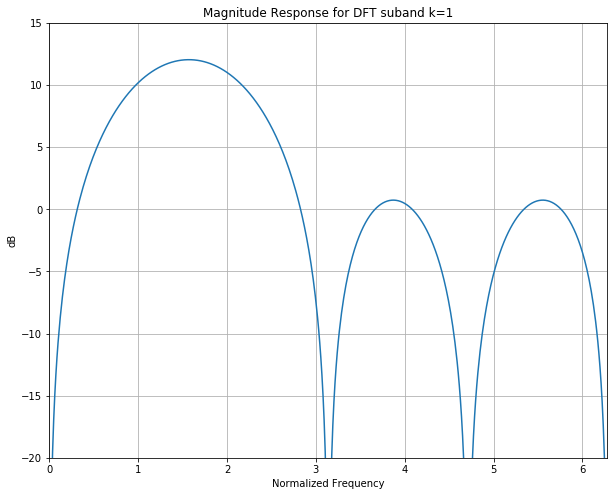

In [5]:
W,H=sp.freqz(np.flipud(T[:,1]),whole=True)
H[H == 0] = np.finfo(float).eps

plt.figure(figsize=(10,8))
plt.plot(W, 20*np.log10(abs(H)))
plt.axis([0,6.28, -20,15])
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Response for DFT suband k=1');
plt.grid()

**Observe:** We have a bad stopband attenuation (less than 20dB).
Also **observe:** The frequency axis is going from **0 to $2\pi$** (instead of just pi). This is because we have a **complex** impulse response. The normalized frequency $2\pi$ is the sampling frequency. 

Since we have a $2\pi$ periodic frequency, this is identical to frequency 0, and the **frequencies from $\pi$ to $2\pi$** can also be seen as the **negative frequencies from $-\pi$ to 0.** This shows that this filter has a **pass band at the positive frequencies, but not at the negative frequencies.**

The equivalent passband at the negative frequencies is obtained from subband k=3,

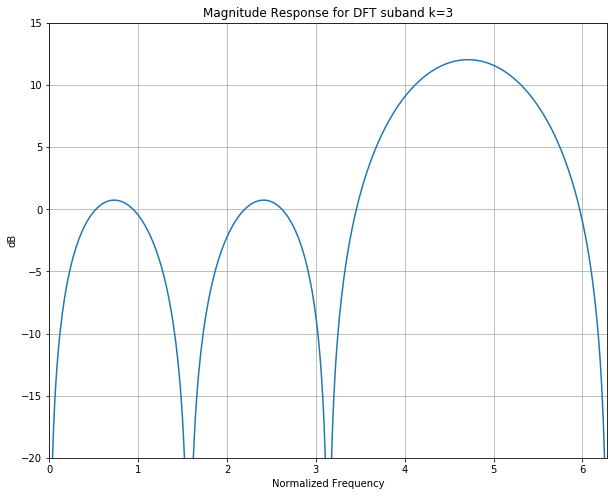

In [6]:
W,H=sp.freqz(np.flipud(T[:,3]),whole=True)
H[H == 0] = np.finfo(float).eps

plt.figure(figsize=(10,8))
plt.plot(W, 20*np.log10(abs(H)))
plt.axis([0,6.28, -20,15])
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Response for DFT suband k=3');
plt.grid()

**Observe:** This looks like the frequency mirrored version of the filter for k=1. This also shows how to separate positive and negative frequencies.

The **low pass is at k=0**, and the **high pass appears at k=2.** Observe that here the high pass appears in the middle, because of this symmetry between positive and negative frequencies.

## Example Transform as Filter Bank:

Now we show in an example that the **transform is** indeed a special case of **a critically sampled filter bank** with the above computed filters.

Take the example signal of length 8:

In [20]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/znEpH7ebWac" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [8]:
x=np.sin(2*np.pi/8*1*np.arange(8))
x

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01])

and its decomposition into blocks of length 4:

In [9]:
xm=np.zeros((2,4))
xm[0,:]=x[0:4]
xm[1,:]=x[4:8]
xm

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01]])

Again we obtain our DFT **transform matrix** as

In [11]:
T=fft.fft(eye(4))
T

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.-0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j]])

We obtain the **transformed blocks** with

In [13]:
yt=np.dot(xm,T)
yt

array([[ 2.41421356+0.00000000e+00j, -1.        +0.00000000e+00j,
        -0.41421356+0.00000000e+00j, -1.        +0.00000000e+00j],
       [-2.41421356+0.00000000e+00j,  1.        -2.22044605e-16j,
         0.41421356+0.00000000e+00j,  1.        +2.22044605e-16j]])

Here, **each row** contains the **spectrum** of each corresponding block.

Now we process the input signal x through a **critically sampled filter bank** with the **equivalent filter impulse responses,** the transform matrix columns, flipped up-down, and down-sampled with the last phase of the blocks, $n_0=N−1=3$ (as it appeared in our derivation of the equivalent impulse responses),

In [14]:
y=np.zeros((2,4))*1j
for k in range(4):
    y[:,k]=sp.lfilter(np.flipud(T[:,k]),1,x)[3::4]
y

array([[ 2.41421356+0.00000000e+00j, -1.        +0.00000000e+00j,
        -0.41421356+0.00000000e+00j, -1.        +0.00000000e+00j],
       [-2.41421356+0.00000000e+00j,  1.        -2.22044605e-16j,
         0.41421356+0.00000000e+00j,  1.        +2.22044605e-16j]])

Compare with the transform output yt.

We can see that yt from the **transform** and y from the critically sampled **filter bank** are indeed the **same!**

**In conclusion:** We see that a **transform** is a **special case** of a **filter bank.** The tool of reading out the impulse responses from a transform matrix allows us to **analyze the resulting filters**, and to judge if they fulfill our requirements.